In [2]:
import numpy as np 
import pandas as pd 
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,balanced_accuracy_score,precision_score,recall_score
from pylab import rcParams
import os
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.metrics import classification_report_imbalanced, sensitivity_specificity_support, specificity_score

In [3]:
dataset = pd.read_csv('./creditcard.csv')
dataset.shape

(284807, 31)

In [4]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
dataset.isnull().values.any()

False

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
dataset.shape

(284807, 31)

### Sample Selection

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['amount_scale'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['time_scale'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

In [5]:
amount_scale = dataset['amount_scale']
time_scale = dataset['time_scale']

dataset.drop(['amount_scale', 'time_scale'], axis=1, inplace=True)
dataset.insert(0, 'amount_scale', amount_scale)
dataset.insert(1, 'time_scale', time_scale)

dataset.head()

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [6]:
dataset = dataset.sample(frac=1)

fraud = dataset.loc[dataset['Class'] == 1]
normal = dataset.loc[dataset['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud, normal])

sample_data = normal_distributed_data.sample(frac=1, random_state=42)

sample_data.head()

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
283429,-0.253616,1.020900,0.064879,0.974903,-0.670731,-0.910996,1.078871,-1.656977,1.616379,-0.564823,...,-0.206645,0.251688,0.767048,-0.293734,0.047480,0.168946,0.154945,-0.145928,0.022670,0
154960,-0.275693,0.224580,-4.517344,2.500224,-4.013928,1.189452,-2.486861,-1.413476,-4.245707,1.265087,...,-1.056162,1.326944,0.102999,0.508167,-0.278018,0.139721,0.064610,-0.972358,0.351360,1
273125,0.105778,0.948578,1.954647,-0.579456,-0.464638,0.149849,-0.164686,0.952902,-0.972879,0.334788,...,-0.063474,0.023184,0.129770,0.196076,-0.341311,-0.423322,0.180131,-0.000327,-0.043512,0
262826,-0.296653,0.892550,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,0.958783,...,0.832035,0.622200,-0.437708,-0.090358,-0.742802,-0.312361,0.502575,0.821390,0.372379,1
11343,-0.293440,-0.762814,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1


In [7]:
sample_data.shape

(984, 31)

# SVM

In [68]:
X = sample_data.drop('Class', axis=1)
y = sample_data['Class']

In [69]:
sm = SMOTE(random_state=42)
Xg, y = sm.fit_resample(X, y)

In [90]:
spec = []
balacc = []
prec = []
recall = []
Cvals = []
for i in [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]:
    X = Xg.iloc[:, 0:i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)
    svm_model = SVC()
    svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}
    svm_cv_model = GridSearchCV(svm_model, svm_params, cv=7, n_jobs=-1, verbose=7).fit(X_train, y_train)
    #print(svm_cv_model.best_score_)
    best_params = svm_cv_model.best_params_
    print(best_params)
    Cvals.append(best_params['C'])
    svm = SVC(C = best_params['C'], kernel=best_params['kernel'], probability=True).fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    spec.append(specificity_score(y_test, y_pred_svm))
    balacc.append(balanced_accuracy_score(y_test, y_pred_svm))
    prec.append(precision_score(y_test, y_pred_svm))
    recall.append(recall_score(y_test, y_pred_svm))
    

Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 9, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 6, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 4, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 2, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 3, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 2, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 3, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 9, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 6, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 7, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 candidates, totalling 126 fits
{'C': 9, 'kernel': 'rbf'}
Fitting 7 folds for each of 18 c

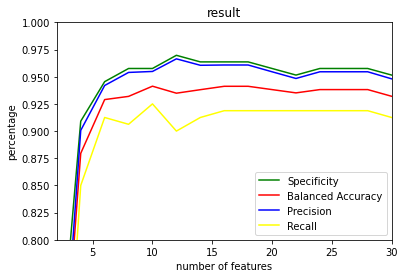

In [87]:
Feat = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
plt.title('result')
plt.axis([2, 30, 0.8, 1])
plt.plot(Feat,spec,color='green',label='Specificity')
plt.plot(Feat,balacc,color='red',label='Balanced Accuracy')
plt.plot(Feat,prec,color='blue',label='Precision')
plt.plot(Feat,recall,color='yellow',label='Recall')
plt.legend()
plt.xlabel('number of features')
plt.ylabel('percentage')
plt.show()

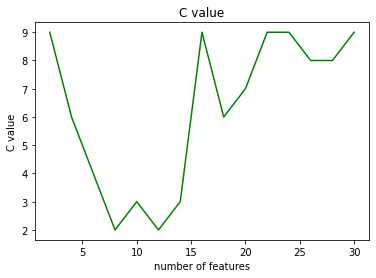

In [92]:
Feat = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
plt.title('C value')
#plt.axis([2, 30, 0.8, 1])
plt.plot(Feat,Cvals,color='green',label='C')
#plt.legend()
plt.xlabel('number of features')
plt.ylabel('C value')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [12]:

svm_model = SVC()

In [13]:
svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}

In [14]:
from sklearn.model_selection import GridSearchCV
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=7, n_jobs=-1, verbose=7).fit(X_train, y_train)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


In [15]:
svm_cv_model.best_score_

0.951447768357063

In [16]:
best_params = svm_cv_model.best_params_
print(best_params)

{'C': 9, 'kernel': 'rbf'}


In [17]:
svm = SVC(C = best_params['C'], kernel=best_params['kernel'], probability=True).fit(X_train, y_train)

In [18]:
y_pred_svm = svm.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred_svm)

0.9323076923076923

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X_test, y_test, cv=21).mean()

0.9382936507936508

In [21]:
print(classification_report(y_test, y_pred_svm))
print(balanced_accuracy_score(y_test, y_pred_svm),precision_score(y_test, y_pred_svm),recall_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       165
           1       0.95      0.91      0.93       160

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325

0.9320075757575758 0.948051948051948 0.9125


In [23]:

print('sensitivity and specificity:', sensitivity_specificity_support(y_test, y_pred_svm, average='micro', labels=pd.unique(dataset.Class)))
print(classification_report_imbalanced(y_test, y_pred_svm))
print(specificity_score(y_test, y_pred_svm))

sensitivity and specificity: (0.9323076923076923, 0.9323076923076923, None)
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.95      0.91      0.93      0.93      0.87       165
          1       0.95      0.91      0.95      0.93      0.93      0.86       160

avg / total       0.93      0.93      0.93      0.93      0.93      0.87       325

0.9515151515151515


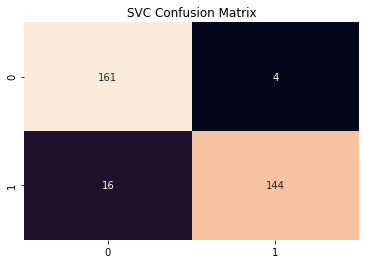

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('SVC Confusion Matrix')
plt.savefig('svc_con_mat')
plt.show()

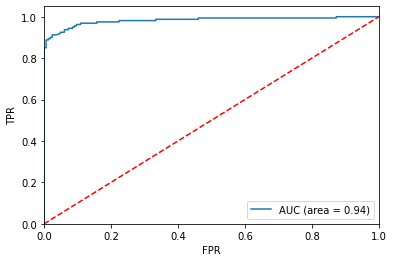

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % svm_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()